# Project 5 - Machine Learning Model in Python

Artificial intelligence has been with us for a long time, but it has never developed at such a dizzying pace as today. Its models accompany us at every step. Starting with assistants in phones and online stores who recommend applications or products to complex language models such as ChatGPT or Bard. This application is extremely wide, and the popularization of these models is due to the growing computing power to which we have access. Thanks to this, almost each of us can build such a model on our computer at home!

In this project, I would like to use a popular set of tools in the most popular programming language, Python, in order not only to better understand the relationship between the data used in previous projects, but also to use them to build a model that will allow predicting the grades obtained by gymnastics competitors!

What are my goals for this project? We know that the final grade is the sum of two components - `DScore` and `EScore` minus the `Penalty`. Therefore, their correlation with the final grade will be clear, but perhaps we can indicate other variables, such as country of origin? We'll check it. Ultimately, I would like to build a model that will have practical applications, e.g. for coaches, and will allow them to determine training priorities by predicting their place in the ranking based on dependent variables! 

In order to understand this project, you should master at least the basics of awarding grades in gymnastics, which is why I am posting them below. (This is the same set of information you can find in [Project 3](https://github.com/Asturn15/Gymnastics-on-GitHub/tree/main/Project%203%20-%20MS%20Excel%20analysis))

---

__`Difficult Score (D score)`__ - is a rating given to a gymnast for how difficult an exercise he performed. It consists of four special requirements for meeting which you can get _0.5_ points. These requirements are different for each instrument (Vault is an exception - there are no requirements here). In addition to the requirements, points are awarded for the 8 most difficult elements - for juniors, 10 for seniors. How do we know how many points each item is worth? These can be found in special tables in the [Code of Points](https://www.gymnastics.sport/publicdir/rules/files/en_%202022-2024%20MAG%20CoP.pdf). In short - the elements are classified into difficulty groups, from _A_ to _J_. Element _A_ of the group is worth _0.1_ points, element _B_ of the group is worth _0.2_ points, etc. At the end of the exercise, the judges evaluating the difficulty by listing all the elements and choose the most difficult ones - with the greatest benefit for the competitor. Some examples:

* Backflip on Floor Exercise is _A_ group - worth _0.1_ points
* Triple backflip on Floor Exercise is _H_ groups - worth _0.8_ points
* Press to handstand on Parallel Bars is _A_ group - worth _0.1_ points
* Double back flip dismnout from Parallel Bars is _C_ group - worth _0.3_ points

One of the requirements on each of the devices is the landing of the appropriate difficulty - Group _C_ for juniors, and Group _D_ for seniors. If the players jump down a group lower, they will receive _0.3_ points for this requirement. All groups below do not meet this requirement. In addition, each device has its own special rules thanks to which the player can get a bonus, however, not wanting to complicate the topic, I will stop here. That's enough for us. I am also posting sample recordings on which you can see the valuation of the entire exercise => 
[Example 1](https://www.youtube.com/watch?v=fQYf1AZqjsg&ab_channel=GymBestEdit)
[Example 2](https://www.youtube.com/watch?v=EiAm__ymb0s&ab_channel=GymBestEdit)
[Example 3](https://www.youtube.com/watch?v=qCGHvQc3mbA&ab_channel=GymBestEdit)

> As I mentioned earlier, the vault is an exception. Here, the coach reports before the start what jump his competitor will perform, and his score is read from the Code of Points. If he makes an easier jump, his score will be reduced accordingly.

__`Execution Score (E score)`__ - is a mark for how correctly the competitor performed his exercise. This grade is set differently from that for difficulty. Each gymnast whose exercise consists of the minimum number of elements - _7_ for juniors, _9_ for seniors, receives __10_ points at the beginning. Points for errors made during the exercise are subtracted from this value.

* _Small_ -  cost _0.1_ point
* _Medium_ - cost _0.3_ point
* _Large_ - cost _0.5_ point
* _Fall_ - cost _1.0_ point

What do we call errors? What is a big mistake and what is only a small one? In short - it's everything that deviates from the perfect performance. It will be easier to understand with specific examples:

* Small hop (approximately - less than foot length) after landing - _small error_ - _0.1_ point
* Hitting the apparatus during exercise - _medium error_ - _0.3_ point
* Failure to withstand the strength element- _large error_ - _0.5_ point

Why does the format of this number have 3 decimal places? As you can easily see, whether the jump is "big" or "medium" or "small" is a relative thing, that's why there are several E judges during the competition, and the score is their arithmetic mean. As always - it's better to see the examples, so as before, watch the videos => 
[Example 1](https://www.youtube.com/watch?v=EXCoDxnAbT8&ab_channel=calebfever)
[Example 2](https://www.youtube.com/watch?v=PsotXyhe1Cg&ab_channel=GymBestEdit)
[Example 3](https://www.youtube.com/watch?v=u2_oOeYwgSo&ab_channel=GymBestEdit)

__`Penalty`__ - Happiness is easier here. These are points deducted for breaking the rules included in the regulations, like:

* Too long exercise
* Use of mattresses where prohibited
* Exercise too short (too few elements)

I intentionally don't give values here because there are a lot of conditions, and it's not that common again.

__`Total Score`__ => (`DScore + EScore`) - `Penalty`

> Looking at what directly affects the final grade, we notice that one of them can be "easily" increased, making our exercise more difficult (D score). The second of these ratings (E score) is a bit more problematic in this respect. Everyone who went for a short jog at least once experienced fatigue, and with it had to slow down. The same applies to gymnastics, so even the simplest exercises are never flawless.

Why do we need to know this? Thanks to this knowledge, it will be easier for us to read the results of the competition. We'll have some idea of what's different between exercises that are, for example, 2.0 difficult score, or 1,000 execution score.

---

Tools used:

- Jupyter notebook

- Python 3.11.2

----

## STEP 1 - Prepare the environment in which we will work!

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Ok, we have environments - now we need data!

In [141]:
df_junior_qualification = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/Qualification.csv", sep=';', decimal=",")
df_junior_AA = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/AA_Final.csv", sep=';', decimal=",")
df_junior_FX = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/FX_Final.csv", sep=';', decimal=",")
df_junior_PH = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/PH_Final.csv", sep=';', decimal=",")
df_junior_SR = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/SR_Final.csv", sep=';', decimal=",")
df_junior_VT = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/VT_Final.csv", sep=';', decimal=",")
df_junior_PB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/PB_Final.csv", sep=';', decimal=",")
df_junior_HB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/2nd_Junior_World_Championship_2023/HB_Final.csv", sep=';', decimal=",")
df_senior_qualification = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/Qualification.csv", sep=';', decimal=",")
df_senior_AA = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/AA_Final.csv", sep=';', decimal=",")
df_senior_FX = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/FX_Final.csv", sep=';', decimal=",")
df_senior_PH = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/PH_Final.csv", sep=';', decimal=",")
df_senior_SR = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/SR_Final.csv", sep=';', decimal=",")
df_senior_VT = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/VT_Final.csv", sep=';', decimal=",")
df_senior_PB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/PB_Final.csv", sep=';', decimal=",")
df_senior_HB = pd.read_csv("E:/Gymnastics on GitHub!/Gymnastics-on-GitHub/Project 5 - ML model in Python/Data used in this project/51_FIG_World_Championship_2022/HB_Final.csv", sep=';', decimal=",")

As the data for Polish competitors is not complete due to the lack of a penalty column, I decided to use the results from international competitions for the purposes of this project.

## STEP 2 - Data wrangling

Okay, we have the data. Before we start working on them, let's take a look at what the tables, column names look like and whether the data has been loaded correctly.

In [142]:
# build dictionary with basic dataframe classifications

all_data_frames = {
    
    #category classificiation

        "junior" : [df_junior_qualification, df_junior_AA, df_junior_FX, df_junior_PH, df_junior_SR, df_junior_VT, df_junior_PB, df_junior_HB],

        "senior" : [df_senior_qualification, df_senior_AA, df_senior_FX, df_senior_PH, df_senior_SR, df_senior_VT, df_senior_PB, df_senior_HB],

    # apparatus classification

        "apparatus" : {
                "Floor Exercise" : [df_junior_FX, df_senior_FX],
                "Pommel Horse" : [df_junior_PH, df_senior_PH],
                "Still Rings" : [df_junior_SR, df_senior_SR],
                "Vault" : [df_junior_VT, df_senior_VT],
                "Parallel Bars" : [df_junior_PB, df_senior_PB],
                "Horizontal Bar" : [df_junior_HB, df_senior_HB]
                },

        "allaround" : [df_junior_qualification, df_junior_AA, 
                       df_senior_qualification, df_senior_AA],
}

# look on column names and data types

for key, value in all_data_frames.items():
    if key == "junior" or key == "senior":
        
        for df in value:
            
            print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rk              120 non-null    int64  
 1   Name            120 non-null    object 
 2   NOC             120 non-null    object 
 3   FX_D_Score      118 non-null    float64
 4   FX_E_Score      120 non-null    float64
 5   FX_Total_Score  120 non-null    float64
 6   FX_Penalty      120 non-null    float64
 7   PH_D_Score      119 non-null    float64
 8   PH_E_Score      120 non-null    float64
 9   PH_Total_Score  120 non-null    float64
 10  PH_Penalty      120 non-null    float64
 11  SR_D_Score      120 non-null    float64
 12  SR_E_Score      120 non-null    float64
 13  SR_Total_Score  120 non-null    float64
 14  SR_Penalty      120 non-null    float64
 15  VT_D_Score      120 non-null    float64
 16  VT_E_Score      120 non-null    float64
 17  VT_Total_Score  120 non-null    flo

When we look at the results, we can notice several important problems:

1. __Column names__ - these are not uniform.

2. __Table format__ - if we want to examine the relationships between individual assessments, differences in the table format will definitely not help us with this, so it should be sorted out.

3. __Number of tables__ - a large number of tables for such simple data unnecessarily complicates the work, so we will reduce them to one table.

4. __Null values__ - some tables have a null value 

Let's start with the simplest thing, i.e. appropriate data label.

In [143]:
# select the data frame

for key, value in all_data_frames.items():
    
    if key == "junior":
        for df in value:
            # add label to each data frame
            df['Category'] = 'junior'

    elif key == "senior":
        for df in value: 
            # add label to each data frame
            df['Category'] = 'senior'


Next, let's deal with column names

In [144]:
# List with correct columns names

col_names = ['Rank', 'Name', 'Country', 'DScore', 'EScore', 'Penalty', 'Total Score', 'Category']

# Select correct data frame from dictionary

for key, value in all_data_frames.items(): 
    if key == 'apparatus':
        for apparatus, frames in value.items():
            if apparatus != "Vault":

                i = 0
                for df in frames: 

                    # renaming columns names to correct form in selected data frame
                    df.columns = col_names

                    # change order of columns
                    df = df[['Rank', 'Name' , 'Country', 'Category', 'DScore', 'EScore', 'Total Score', 'Penalty']]

                    # look on results
                    print(df.info())
                    
                    #save result  to dictionary
                    frames[i] = df
                    i += 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8 non-null      int64  
 1   Name         8 non-null      object 
 2   Country      8 non-null      object 
 3   Category     8 non-null      object 
 4   DScore       8 non-null      float64
 5   EScore       8 non-null      float64
 6   Total Score  8 non-null      float64
 7   Penalty      8 non-null      float64
dtypes: float64(4), int64(1), object(3)
memory usage: 644.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8 non-null      int64  
 1   Name         8 non-null      object 
 2   Country      8 non-null      object 
 3   Category     8 non-null      object 
 4   DScore       8 non-null      float64
 5   EScore   

Ok, all the tables that only needed to be renamed are ready. Next, we will deal with those whose form needs to be modified. First Vault result.

In [145]:
# Changing the order of columns in the df_junior_VT data frame

all_data_frames['apparatus']['Vault'][0] = all_data_frames['apparatus']['Vault'][0][['Rank','Name','NOC', 
                                              'VT1_Dscore', 'VT1_Escore', 'VT1_Total_Score', 'VT1_Penalty', 
                                              'VT2_Dscore', 'VT2_Escore', 'VT2_Total_Score', 'VT2_Penalty', 
                                              'VT_Total_Score', 'Category']]


# select correct data frame from dictionary
for key, value in all_data_frames.items():
    if key == 'apparatus':
        for apparatus, frames in value.items():
            i = 0  # declare local variable needed in operation
            if apparatus == "Vault":
                for df in frames:

                    # drop a column with data that we will not need later in the work. 
                    df.drop(columns=df.columns[-2], axis = 1, inplace = True)

                    # changing the name of the columns due to the wide_to_long function used later
                    df.columns = ['Rank', 'Name', 'Country', 'DScore_VT A', 'EScore_VT A', 'Total Score_VT A', 'Penalty_VT A', 'DScore_VT B', 'EScore_VT B', 'Total Score_VT B', 'Penalty_VT B', 'Category']

                    # changing the form of the table
                    df = pd.wide_to_long(
                        df,
                        ['DScore', 'EScore', 'Total Score', 'Penalty'],
                        i = ['Rank','Name','Category'],
                        j = 'Apparatus',
                        sep = "_",
                        suffix = '\D+').reset_index()
                    
                    # look on result
                    print(df.info())
                    
                    # add result to dictionary
                    frames[i] = df
                    i += 1
                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         16 non-null     int64  
 1   Name         16 non-null     object 
 2   Category     16 non-null     object 
 3   Apparatus    16 non-null     object 
 4   Country      16 non-null     object 
 5   DScore       16 non-null     float64
 6   EScore       16 non-null     float64
 7   Total Score  16 non-null     float64
 8   Penalty      16 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         16 non-null     int64  
 1   Name         16 non-null     object 
 2   Category     16 non-null     object 
 3   Apparatus    16 non-null     object 
 4   Country   

Next all around results.

In [146]:
# select correct data frame from dictionary
for key, value in all_data_frames.items():
    i = 0 # declare local variable needed in operation
    if key == 'allaround':
        for df in value:

            # drop a column with data that we will not need later in the work. 
            df.drop(columns=df.columns[-2], axis = 1, inplace = True)

            # changing the name of the columns due to the wide_to_long function
            df.columns = ['Rank', 'Name', 'Country', 
                'DScore_FX', 'EScore_FX', 'Total Score_FX', 'Penalty_FX', 
                'DScore_PH', 'EScore_PH', 'Total Score_PH', 'Penalty_PH', 
                'DScore_SR', 'EScore_SR', 'Total Score_SR', 'Penalty_SR', 
                'DScore_VT', 'EScore_VT', 'Total Score_VT', 'Penalty_VT', 
                'DScore_PB', 'EScore_PB', 'Total Score_PB', 'Penalty_PB', 
                'DScore_HB', 'EScore_HB', 'Total Score_HB', 'Penalty_HB', 'Category']

            # changing the form of the table          
            df = pd.wide_to_long(
                df,
                ['DScore', 'EScore', 'Total Score', 'Penalty'],
                i = ['Rank', 'Name', 'Country', 'Category'],
                j = 'Apparatus',
                sep = "_",
                suffix = '\D+').reset_index()
            
            # look on results
            print(df.info())
            
            # add result to dictionary
            value[i] = df
            i += 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         720 non-null    int64  
 1   Name         720 non-null    object 
 2   Country      720 non-null    object 
 3   Category     720 non-null    object 
 4   Apparatus    720 non-null    object 
 5   DScore       717 non-null    float64
 6   EScore       720 non-null    float64
 7   Total Score  720 non-null    float64
 8   Penalty      720 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 50.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         144 non-null    int64  
 1   Name         144 non-null    object 
 2   Country      144 non-null    object 
 3   Category     144 non-null    object 
 4   Appar

Ok, let's compare the results of our recent actions

In [147]:
# selecting the last tables we worked on
for key, value in all_data_frames.items():

    if key == 'allaround':
        for df in value:
            print(df.info())

    elif key == 'apparatus':
        for apparatus, frames in value.items():
            for df in frames:
                print(df.info())
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8 non-null      int64  
 1   Name         8 non-null      object 
 2   Country      8 non-null      object 
 3   Category     8 non-null      object 
 4   DScore       8 non-null      float64
 5   EScore       8 non-null      float64
 6   Total Score  8 non-null      float64
 7   Penalty      8 non-null      float64
dtypes: float64(4), int64(1), object(3)
memory usage: 644.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8 non-null      int64  
 1   Name         8 non-null      object 
 2   Country      8 non-null      object 
 3   Category     8 non-null      object 
 4   DScore       8 non-null      float64
 5   EScore   

At this stage we can notice one more difference between the tables - some of them have a label marked as an apparatuts, and some do not - let's fix it.

In [148]:
# select dataframe
for key, value in all_data_frames.items(): 
    if key == 'apparatus':
        for apparatus, frames in value.items():
                
                # add column 'Apparatus' with label to specific dataframe
                if apparatus == 'Floor Exercise':
                     for df in frames:
                          df.insert(4, 'Apparatus', 'FX')
                
                elif apparatus == 'Pommel Horse':
                     for df in frames:
                          df.insert(4,'Apparatus','PH')
                
                elif apparatus == 'Still Rings':
                     for df in frames:
                          df.insert(4,'Apparatus','SR')

                elif apparatus == 'Vault':
                     for df in frames:
                          df[['Apparatus']] = 'VT'
                
                elif apparatus == 'Parallel Bars':
                     for df in frames:
                          df.insert(4,'Apparatus','PB')

                elif apparatus == 'Horizontal Bar':
                     for df in frames:
                          df.insert(4,'Apparatus','HB')

Towards the end of the data cleaning stage, all we had to do was combine all the tables into one.

In [149]:
# Make list where we can write all clear data frames
clean_df = []

# write data frames on our list
for key, value in all_data_frames.items():

    if key == 'allaround':
        for df in value:
            clean_df.append(df)

    elif key == 'apparatus':
        for apparatus, frames in value.items():
            for df in frames:
                clean_df.append(df)

# use this list to build one data frame              
training_df = pd.concat(clean_df)

# look null values
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1696 entries, 0 to 143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1696 non-null   int64  
 1   Name         1696 non-null   object 
 2   Country      1696 non-null   object 
 3   Category     1696 non-null   object 
 4   Apparatus    1696 non-null   object 
 5   DScore       1685 non-null   float64
 6   EScore       1693 non-null   float64
 7   Total Score  1681 non-null   float64
 8   Penalty      1693 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 132.5+ KB


Before we start analyzing the data will be to get rid of unnecessary columns and discard those rows containing empty values.
If a gymnasts did not compete on some apparatus, e.g. in the qualifications, we do not have his results, so we cannot complete this data.

In [150]:
# Change zero values to NaN in column with total score
training_df.loc[training_df['Total Score'] == 0, 'Total Score'] = np.nan

# Find rows with null data
training_df[training_df.isnull().any(axis=1)]

,Rank,Name,Country,Category,Apparatus,DScore,EScore,Total Score,Penalty
702,118,CHIANG Yu-Li,TPE,junior,FX,NaN,0.0,NaN,0.0
706,118,CHIANG Yu-Li,TPE,junior,PB,0.0,0.0,NaN,0.0
707,118,CHIANG Yu-Li,TPE,junior,HB,0.0,0.0,NaN,0.0
713,119,MRO Menton Toni,BAN,junior,HB,0.0,0.0,NaN,0.0
714,120,GORMACK Oliver,NZL,junior,FX,NaN,0.0,NaN,0.0
715,120,GORMACK Oliver,NZL,junior,PH,NaN,0.0,NaN,0.0
716,120,GORMACK Oliver,NZL,junior,SR,0.0,0.0,NaN,0.0
717,120,GORMACK Oliver,NZL,junior,VT,0.0,0.0,NaN,0.0
718,120,GORMACK Oliver,NZL,junior,PB,0.0,0.0,NaN,0.0
719,120,GORMACK Oliver,NZL,junior,HB,0.0,0.0,NaN,0.0


In [151]:
# drop all rows with null data
training_df.dropna(subset=['DScore','EScore','Total Score'], inplace = True)

# drop columns with unecessary data
training_df.drop(columns=['Rank','Name'], inplace = True)

# look on final form our dataframe
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1662 entries, 0 to 143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1662 non-null   object 
 1   Category     1662 non-null   object 
 2   Apparatus    1662 non-null   object 
 3   DScore       1662 non-null   float64
 4   EScore       1662 non-null   float64
 5   Total Score  1662 non-null   float64
 6   Penalty      1662 non-null   float64
dtypes: float64(4), object(3)
memory usage: 103.9+ KB


The ranking in the form it was in our table will not be useful to us because it is mostly based on the sum of scores in the all-around and qualifications. Let's create a column in which we will find a ranking of ratings by category and apparatus.

The name column contains personal data, so we can get rid of it for the needs of our project.

In [152]:
# Creating a column based on which players will be classified appropriately 
training_df['Rank Score'] = training_df['Total Score'].add(training_df['EScore'].mul(0.01)).add(training_df['DScore'].mul(0.001))

# Create a column with rank based on group - Category first and Apparatus second - for every category
training_df['Rank'] = training_df.groupby(['Category', 'Apparatus'])['Rank Score'].rank(ascending=False, method='dense').astype(int)

# Fast check results
print(training_df.loc[
    # example columns
    training_df['Category']=='senior'
    # sort to easy check
    ].sort_values(by=['Rank']).to_string())

# removal of the auxiliary column
training_df.drop(columns = 'Rank Score', inplace = True) 

    Country Category Apparatus  DScore  EScore  Total Score  Penalty  Rank Score  Rank
0       CHN   senior        PB     6.9   9.266       16.166      0.0    16.26556     1
0       TUR   senior        SR     6.3   8.633       14.933      0.0    15.02563     1
11      JPN   senior        HB     6.7   8.400       15.100      0.0    15.19070     1
12      PHI   senior        FX     6.4   8.866       15.266      0.0    15.36106     1
0       IRL   senior        PH     6.4   8.900       15.300      0.0    15.39540     1
1       ARM   senior        VT     5.6   9.500       15.100      0.0    15.20060     1
1       JOR   senior        PH     6.3   8.566       14.866      0.0    14.95796     2
1       CHN   senior        SR     6.3   8.566       14.866      0.0    14.95796     2
1       GER   senior        PB     6.6   8.900       15.500      0.0    15.59560     2
42      PHI   senior        FX     6.4   8.766       15.166      0.0    15.26006     2
563     CHN   senior        HB     6.4   8.

Next step is transform the values ​​in the "Category" and "Apparatus" columns into numerical ones for the purposes of building a model.

In [153]:
# Change string to numbers
training_df.replace({"junior": 0, "senior": 1,"FX":1,"PH":2,"SR":3,"VT":4,"PB":5,"HB":6}, inplace=True)


We have one more column left - Country. Let's check how the number of results we have for individual countries is distributed in order to avoid the error of lack of appropriate data representation in our model.

<Axes: xlabel='Country'>

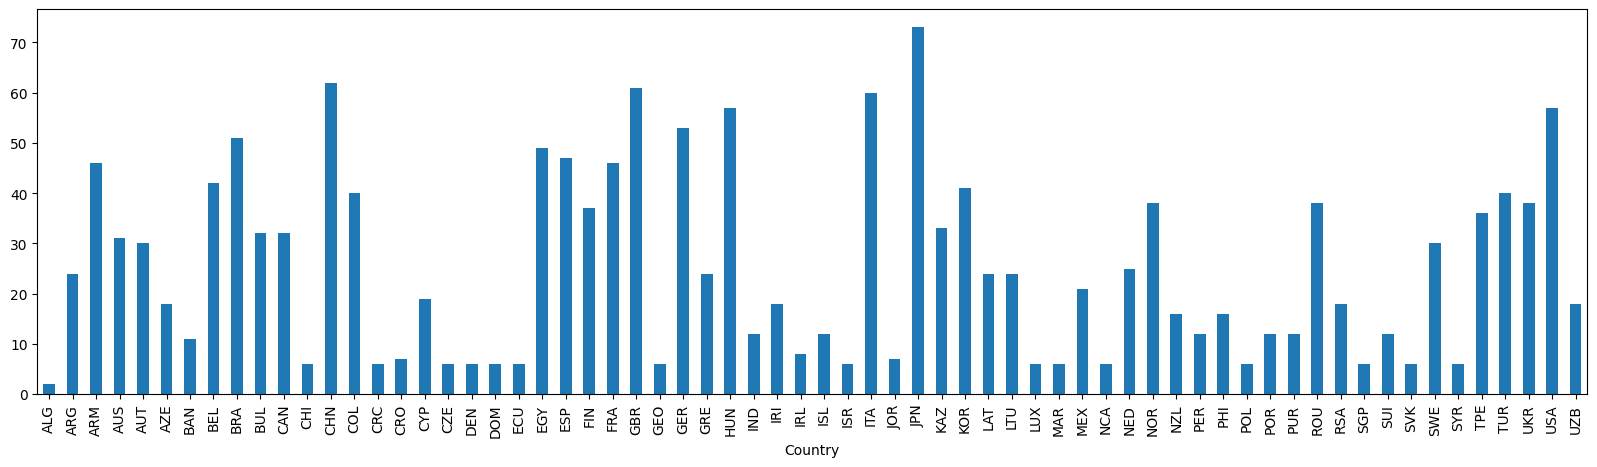

In [154]:
# dataframe with countries data
country_list = training_df[['Country']].groupby(training_df['Country']).count()

# change column name
country_list.columns = ['Sum of results']
country_list.reset_index(inplace=True)

# plot simply chart
country_list.plot(x = 'Country', y = 'Sum of results', kind='bar', legend = False, figsize=(20,5))

A quick look at the chart above is enough to understand that the division by country of origin will be harmful because we do not have enough data.
To eliminate the disproportions in the results, I decided to group countries based on their location on the map, official language or common history.
A description of each group along with a list of the countries they belong to can be found below.

1. __Group 1__ - _Asia_ - Japan (JPN), China (CHN), South Korea (KOR), Philippines (PHI), Singapore (SGP), Taiwan (TPE)

2. __Group 2__ - _Scandinavia_ - Sweden (SWE), Denmark (DEN), Norway (NOR), Finland (FIN), Iceland (ISL)

3. __Group 3__ - _Latin America_ - Columbia (COL), Brazil (BRA), Mexico (MEX), Argentina (ARG), Puerto Rico (PUR), Ecuador (ECU), Chile (CHI), Dominican Republic (CHI), Costa Rica(CRC)

4. __Group 4__ - _English-speaking countries_ - Great Britain (GBR), Ireland (IRL), Australia (AUS), New Zealand (NZL), United States (USA), Canada (CAN)

5. __Group 5__ - _Benelux and German-speaking countries_ - Germany (GER), Netherlands (NED), Austria(AUT), Belgium (BEL), Switzerland (SUI), Luxemburg (LUX)

6. __Group 6__ - Other Western European countries_ - Italy (ITA), Spain (ESP), France (FRA), Portugal (POR)

7. __Group 7__  - _Central Europen countries_ - Poland (POL), Czech Republic (CZE), Slovakia (SVK), Lativia (LAT), Lithuania (LTU), Hungary (HUN)

8. __Group 8__ - _Estern European countries_ - Ukraine (UKR), Georgia (GEO), Armenia (ARM), Azerbaijan (AZE), Uzbekistan (UZB), Kazakhstan (KAZ)

9. __Group 9__ - South European countries_ - Romania (ROU), Bulgaria (BUL), Croatia (CRO), Turkey (TUR), Cyprus (CYP), Greece (GRE), Israel (ISR)

10. __Group 10__ - _Other countries_ - Egypt (EGY), Jordan (JOR), Bangladesh (BAN), Indie (IND), Syria (SYR), Marocco (MAR), Algeria (ALG), Nicaragua (NCA), South Africa (RSA)

Of course, these countries can be classified in a completely different way, but this is one of the proposals to solve the problem of data disproportions that we have defined.

In [155]:
# build a dictionary with group classification
country_classification = {
    1 : ['JPN', 'CHN', 'KOR', 'PHI', 'SGP', 'TPE'],
    2 : ['SWE', 'ISL', 'DEN', 'FIN', 'NOR'],
    3 : ['COL', 'BRA', 'MEX', 'ARG', 'PUR', 'ECU', 'PER', 'CRC', 'CHI', 'DOM'],
    4 : ['AUS', 'GBR', 'IRL', 'USA', 'CAN', 'NZL'],
    5 : ['GER', 'NED', 'BEL', 'LUX', 'SUI', 'AUT'],
    6 : ['ITA', 'FRA', 'ESP', 'POR'],
    7 : ['SVK', 'LTU', 'LAT', 'POL', 'CZE', 'HUN'],
    8 : ['ARM', 'UKR', 'GEO', 'KAZ', 'UZB', 'IRI', 'AZE'],
    9 : ['ROU', 'BUL', 'CRO', 'TUR', 'CYP', 'GRE', 'ISR'],
    10 : ['EGY', 'JOR', 'NCA', 'RSA', 'BAN', 'IND', 'SYR', 'MAR', 'ALG']
}

# change values in table with results
for i, r in training_df.iterrows():
    if r['Country'] in country_classification[1]:
        training_df.at[i, 'Country'] = 1
    elif r['Country'] in country_classification[2]:
        training_df.at[i, 'Country'] = 2
    elif r['Country'] in country_classification[3]:
        training_df.at[i, 'Country'] = 3
    elif r['Country'] in country_classification[4]:
        training_df.at[i, 'Country'] = 4
    elif r['Country'] in country_classification[5]:
        training_df.at[i, 'Country'] = 5
    elif r['Country'] in country_classification[6]:
        training_df.at[i, 'Country'] = 6
    elif r['Country'] in country_classification[7]:
        training_df.at[i, 'Country'] = 7
    elif r['Country'] in country_classification[8]:
        training_df.at[i, 'Country'] = 8
    elif r['Country'] in country_classification[9]:
        training_df.at[i, 'Country'] = 9
    elif r['Country'] in country_classification[10]:
        training_df.at[i, 'Country'] = 10

# changle data type to numeric
training_df['Country'] = training_df['Country'].astype(int)

Let's check how the results break down now.

<Axes: xlabel='Country'>

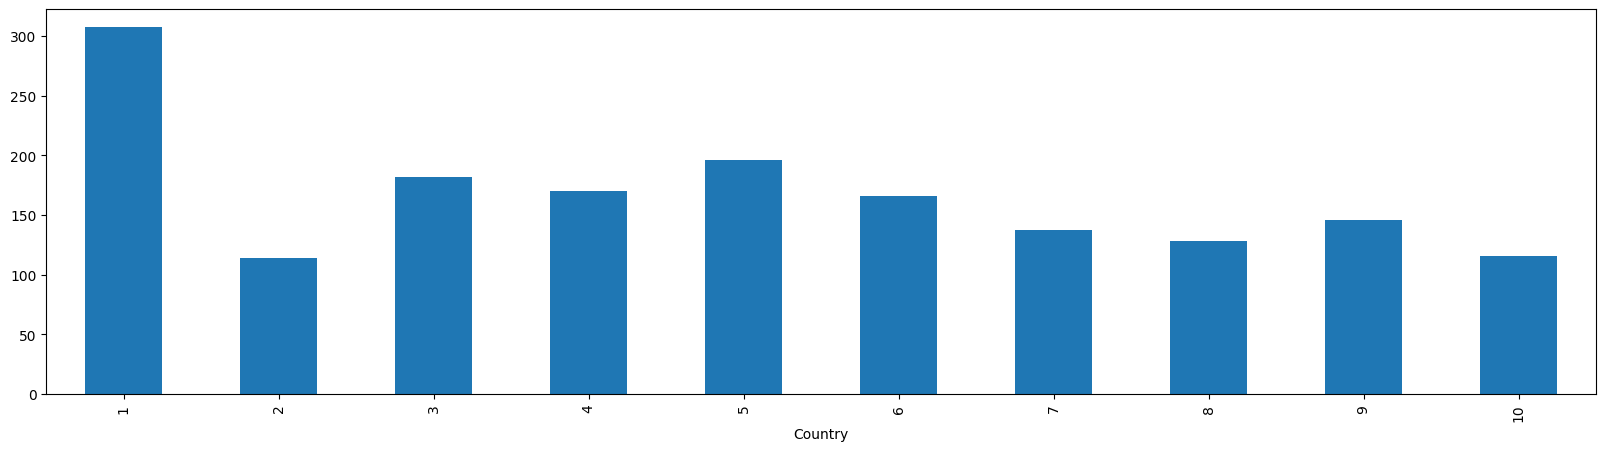

In [156]:
# plot chart for gruped data
training_df[['Country','Total Score']].groupby(['Country']).count().plot(kind='bar', legend = False, figsize=(20,5))

This time the distribution looks much better. Although we still observe disproportions (especially between the amount of data for Asian players), the results for other countries look much better.

Thanks to all these operations, we have data ready to take a closer look at them and find relationships that will allow us to build our model!

> A few words of commentary on the data we got rid of during the entire process:
>
> __VT_Total_Score__ - a column containing the average of two jumps, for the purposes of this project we will not need the final score, we will rely on individual vault.
>
>__AA_Score__ - sum of all scores in all around - as in the case of values earlier - in this project I will not focus on the sum of the results, but I will take into account individual components.
>

---

## STEP 3 - Analysis

After a long, but important introduction, we can start data exploration!

Thanks to the simple __describe__ function, we can quickly see the basic mathematical description for each column.

In [157]:
# print description for each column
training_df.describe()

,Country,Category,Apparatus,DScore,EScore,Total Score,Penalty,Rank
count,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000
mean,4.930205,0.452467,3.503008,4.577978,8.082511,12.616326,-0.044164,61.738267
std,2.895938,0.497885,1.700212,0.897100,0.846042,1.340438,0.286395,36.886659
min,1.000000,0.000000,1.000000,0.800000,4.066000,3.600000,-6.300000,1.000000
25%,2.000000,0.000000,2.000000,4.000000,7.666000,12.000000,0.000000,30.000000
50%,5.000000,0.000000,4.000000,4.600000,8.233000,12.800000,0.000000,59.000000
75%,7.000000,1.000000,5.000000,5.200000,8.700000,13.500000,0.000000,91.000000
max,10.000000,1.000000,6.000000,6.900000,9.700000,16.166000,0.000000,145.000000


By looking at the minimum and average values, we can quickly identify the occurrence of outliers in the `"DScore", "EScore", "Total Score", "Penalty"` columns.

__Why this is important?__

Because outliers can affect your analysis in several ways. They can skew your data and affect the mean and standard deviation, making it difficult to obtain accurate estimates. Outliers can also affect the regression line and lead to incorrect predictions. Therefore, it is crucial to identify and exclude outliers before conducting any analysis.

Since the value of the `"Total Score"` column consists of all the others, we will take a closer look at the distribution of values ​​in this column.

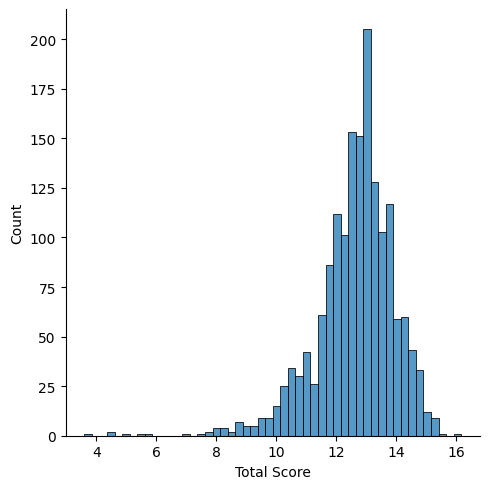

In [158]:
# plot dirtibution chart 
distribution = sns.displot(data = training_df['Total Score'])

Thanks to this, we can notice a "long tail" on the left side of the graph, which will indicate the presence of outlier data.

Ok, we have the chart, but how do we identify these records in the table? There are several methods for dealing with outliers like Z-Score or Interquartile Range (IQR). Which we should use? If the data is normally distributed, we can use z-score to label points that are farther than three standard deviations away from the mean as outliers. If the data is not normally distributed like in this project, interquartile range or percentage methods to detect outliers are much better.

Interquartile range is a quantity that measures the difference between the first and the third quartiles in a given dataset. 

* The first quartile is also called the one-fourth quartile, or the 25% quartile. If q25 is the first quartile, it means 25% of the points in the dataset have values less than q25.
* The third quartile is also called the three-fourth, or the 75% quartile. If q75 is the three-fourth quartile, 75% of the points have values less than q75.

Using the above notations, IQR = q75 - q25.
Based on the above information, we will identify outlier data using the formula:

* Lower bound: __q25 - 1.5 * IQR__ 
* Upper bound: __q75 + 1.5 * IQR__

Now that we have identified the outliers in our data set, let's take a look at them.

In [107]:
# Value for first and third quartiles
Q1 = training_df['Total Score'].quantile(0.25)
Q3 = training_df['Total Score'].quantile(0.75)

# Interquartile range value
IQR = Q3 - Q1

# identify outliers in our dataset based on IRQ method
outliers = training_df[(training_df['Total Score'] < Q1 - 1.5 * IQR) | (training_df['Total Score'] > Q3 + 1.5 * IQR)]

# look on our outlier
outliers

,Country,Category,Apparatus,DScore,EScore,Total Score,Penalty,Rank
0,1,1,5,6.9,9.266,16.166,0.0,1
55,3,0,2,3.9,5.733,9.633,0.0,129
337,4,0,2,4.3,5.266,9.566,0.0,131
504,4,0,1,4.3,5.400,9.700,0.0,140
530,1,0,3,2.6,6.333,8.633,-0.3,130
539,10,0,6,3.5,5.433,8.933,0.0,137
559,1,0,2,3.2,6.366,9.566,0.0,130
565,1,0,2,3.6,5.500,9.100,0.0,135
577,1,0,2,2.5,7.200,9.700,0.0,127
583,10,0,2,2.7,6.000,8.700,0.0,138


This is long table so let's plot a chart to better understand, why this is outliters! Since `Total Score` is a final score, to better understand why it was classified as an outlier, let's look at the value of its individual components.

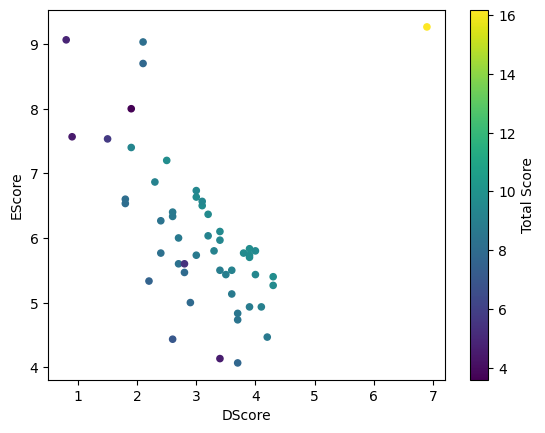

In [108]:
# scatter chart with ouliers data
outliers_chart = outliers.plot.scatter( x = 'DScore', y = 'EScore', c = 'Total Score')

Looking at the chart, we can divide all outliers into 3 groups:

* __Extremely high ratings__ - Upper right corner of the chart.
* __Grades with a low Difficult Score__ - These are grades that do not meet the minimum requirements for DScore at international competitions (2,6 for junior and 2,9 for senior). This also involves high penalties because negative points are entered in this column for unmet requirements during the exercise.
* __Grades with more than one fall__ - A fall during an exercise is penalized with 1 point from the EScore. If the athlete had more falls, the grade is correspondingly lower. This, combined with other deductions, will mean that this one will not count in the competition and will result in good placements.

By looking at the above chart and drawing conclusions from it, we can discount the scores classified as outliers without any harm to our data, as all of them are unrepresentative.

In [109]:
# drop outliers from our dataset
training_df.drop(outliers.index, inplace = True)

Now, thanks to all these operations, our data is ready to build a model based on them. Let's take a look at the relationships between them!

<Axes: >

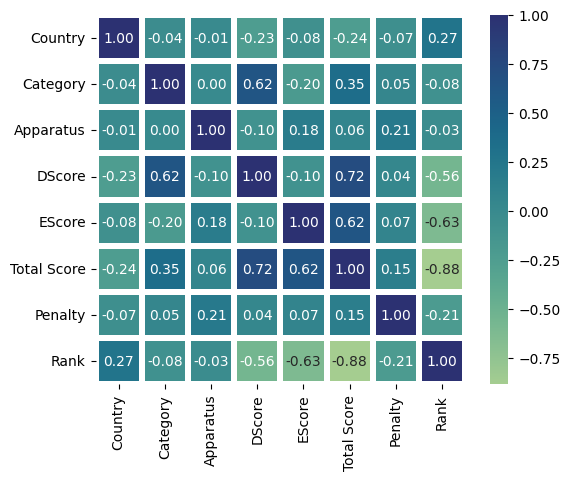

In [131]:
# correlation matrix
corrmat = training_df.corr()

# print correlations matrix like heatmap
sns.heatmap(corrmat, vmax = 1, cmap = 'crest', square=True, annot = True, fmt = '.2f', linewidths = 3)

<Axes: xlabel='Total Score', ylabel='Rank'>

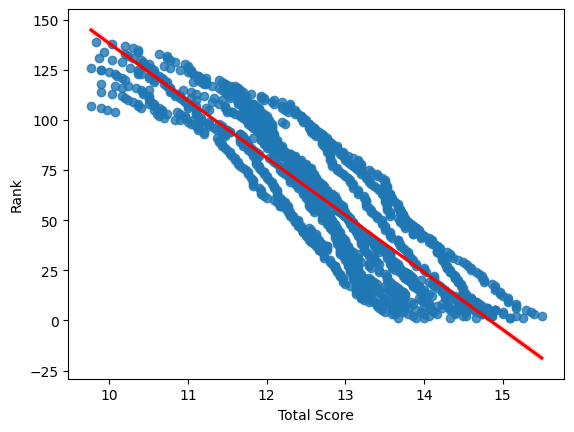

In [138]:
sns.regplot(data = training_df, x = 'Total Score', y = 'Rank', line_kws=dict(color='r'))